In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

(X_train,y_train),(X_test,y_test)=reuters.load_data(num_words=1000,test_split=0.2)

category=np.max(y_train)+1

print(category,'카테고리')
print(len(X_train),'학습용 뉴스 기사')
print(len(X_test),'테스트용 뉴스 기사')
print(X_train[0])




46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [2]:
X_train=sequence.pad_sequences(X_train,maxlen=100)
X_test=sequence.pad_sequences(X_test,maxlen=100)

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)


In [3]:
model=Sequential()
model.add(Embedding(1000,100))
model.add(LSTM(100,activation='tanh'))
model.add(Dense(46,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         100000    
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 46)                4646      
                                                                 
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

early_stopping_callback=EarlyStopping(monitor='val_loss',patience=5)


In [8]:
history=model.fit(X_train,y_train,batch_size=20,epochs=200,validation_data=(X_test,y_test),callbacks=[early_stopping_callback])

print('\n Test Accuracy: %.4f'%(model.evaluate(X_test,y_test)[1]))

Epoch 1/200
450/450 [==============================] - 12s 10ms/step - loss: 2.1667 - accuracy: 0.4683 - val_loss: 2.0132 - val_accuracy: 0.5009
Epoch 2/200
450/450 [==============================] - 4s 9ms/step - loss: 1.8287 - accuracy: 0.5365 - val_loss: 1.7585 - val_accuracy: 0.5396
Epoch 3/200
450/450 [==============================] - 4s 9ms/step - loss: 1.6895 - accuracy: 0.5679 - val_loss: 1.6719 - val_accuracy: 0.5819
Epoch 4/200
450/450 [==============================] - 4s 9ms/step - loss: 1.5189 - accuracy: 0.6228 - val_loss: 1.4799 - val_accuracy: 0.6282
Epoch 5/200
450/450 [==============================] - 4s 10ms/step - loss: 1.3308 - accuracy: 0.6631 - val_loss: 1.3702 - val_accuracy: 0.6589
Epoch 6/200
450/450 [==============================] - 4s 10ms/step - loss: 1.2115 - accuracy: 0.6969 - val_loss: 1.2718 - val_accuracy: 0.6843
Epoch 7/200
450/450 [==============================] - 4s 9ms/step - loss: 1.1099 - accuracy: 0.7239 - val_loss: 1.2333 - val_accuracy: 0.

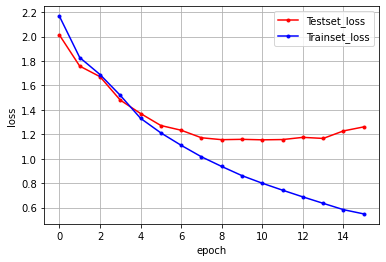

In [9]:
y_vloss=history.history['val_loss']
y_loss=history.history['loss']

x_len=np.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='.',c='red',label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()